# Figure for the lever-centered firing rate maps

In [1]:
%load_ext autoreload
%autoreload 2
%run setup_project.py
prepareSessionsForSpatialAnalysisProject(sSesList,myProject.sessionList,pose_file_extension = ".pose_kf.npy")

Project name: autopi_ca1
dataPath: /adata/projects/autopi_ca1
dlcModelPath: /adata/models
Reading /adata/projects/autopi_ca1/sessionList
We have 39 testing sessions in the list
See myProject and sSesList objects
Loading Animal_pose and Spike_train, sSes.ap and sSes.cg


100%|███████████████████████████████████████████| 39/39 [00:26<00:00,  1.48it/s]

Loading ses.trial_table_simple as ses.trials
Create condition intervals in ses.intervalDict


To get our ses.trialList

In [2]:
%%time
myProjectWithTrials = loadMyProjectWithTrials(myProject)

Loading: /adata/projects/autopi_ca1/results/myProjectWithTrials.pickle
CPU times: user 6.88 s, sys: 4.02 s, total: 10.9 s
Wall time: 21.2 s


## Load the data

In [25]:
fn = "/adata/projects/autopi_ca1/results/myMaps.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myMaps = pickle.load(handle)
    
fn = "/adata/projects/autopi_ca1/results/myLeverMaps.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myLeverMaps = pickle.load(handle)
    
fn=myProject.dataPath+"/results/myLeverMapsDissociate.pickle"
with open(fn, 'rb') as handle:
    myLeverMapsDissociate = pickle.load(handle)
    
fn=myProject.dataPath+"/results/myLeverMapsStats.pickle"
with open(fn, 'rb') as handle:
    myLeverMapsStats = pickle.load(handle)

fn=myProject.dataPath+"/results/myLeverMapsDissociateStats.pickle"
with open(fn, 'rb') as handle:
    myLeverMapsDissociateStats = pickle.load(handle)

fn = "/adata/projects/autopi_ca1/results/myLeverQuadMaps.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myLeverQuadMaps = pickle.load(handle)
   
fn = "/adata/projects/autopi_ca1/results/myLeverHistos.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myLeverHistos = pickle.load(handle)

fn = "/adata/projects/autopi_ca1/results/myAutos.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myAutos = pickle.load(handle)
    
fn=myProject.dataPath+"/results/leverMapCor.pickle"
with open(fn, 'rb') as handle:
    leverMapCor = pickle.load(handle)

fn=myProject.dataPath+"/results/leverQuadMapCor.pickle"
with open(fn, 'rb') as handle:
    leverQuadMapCor = pickle.load(handle)

fn=myProject.dataPath+"/results/leverHistoCor.pickle"
with open(fn, 'rb') as handle:
    leverHistoCor = pickle.load(handle)
    
fn=myProject.dataPath+"/results/leverQuadMapRotCor.pickle"
with open(fn, 'rb') as handle:
    leverQuadMapRotCor = pickle.load(handle)
  
fn=myProject.dataPath+"/results/leverIFRDict.pickle"
with open(fn, 'rb') as handle:
    leverIFR = pickle.load(handle)


## Filter for pyramidal cells

In [26]:
fn=myProject.dataPath+"/results/cell_classification.csv"
ct = pd.read_csv(fn)
ct

,id,session,subject,valid,cellType,meanRate,shank,layer
0,mn5824-20112020-0107_80,mn5824-20112020-0107,mn5824,False,NaN,9.201345,4,pyr
1,mn5824-20112020-0107_90,mn5824-20112020-0107,mn5824,False,NaN,8.236764,3,pyr
2,mn5824-20112020-0107_92,mn5824-20112020-0107,mn5824,True,pyr,7.885922,4,pyr
3,mn5824-20112020-0107_96,mn5824-20112020-0107,mn5824,False,NaN,4.153462,1,dn
4,mn5824-20112020-0107_98,mn5824-20112020-0107,mn5824,False,NaN,3.411940,4,pyr
...,...,...,...,...,...,...,...,...
1263,mn9686-01112021-0106_238,mn9686-01112021-0106,mn9686,False,NaN,4.669745,7,dn
1264,mn9686-01112021-0106_240,mn9686-01112021-0106,mn9686,False,NaN,9.647625,2,pyr
1265,mn9686-01112021-0106_241,mn9686-01112021-0106,mn9686,False,NaN,16.161014,2,pyr
1266,mn9686-01112021-0106_242,mn9686-01112021-0106,mn9686,True,pyr,5.270951,1,pyr


In [27]:
if ct.shape[0]!=myMaps["circ80"].shape[0]:
    print("problem with length of cell_classification.csv")

In [28]:
pyrIndices=ct.cellType=="pyr"
pyrId=ct.id[ct.cellType=="pyr"]
print("Pyramidal cells: {}".format(np.sum(ct.cellType=="pyr")))


Pyramidal cells: 438


In [29]:
for k in myMaps.keys():
    myMaps[k] = myMaps[k][pyrIndices]

In [30]:
for d in [myLeverMaps,myLeverMapsDissociate,myLeverMapsStats,myLeverMapsDissociateStats]:
    for k in d.keys():
        for kk in d[k].keys():
            for kkk in d[k][kk].keys():
                d[k][kk][kkk] = d[k][kk][kkk][pyrIndices]

In [31]:
for lc in  myLeverQuadMaps.keys():
    for k in myLeverQuadMaps[lc].keys():
        myLeverQuadMaps[lc][k] = myLeverQuadMaps[lc][k][pyrIndices] 

In [32]:
myLeverHistos[3]

{'light': array([14.31464986,  8.32531665, 13.51532667, ..., 15.18086469,
         3.98142401,  4.46277409]),
 'dark': array([ 9.4190165 ,  7.77399079,  9.11384318, ..., 17.83885461,
        10.1243159 ,  6.08078732]),
 'all_light': array([14.09205515, 11.47599146, 18.96162005, ..., 22.20781613,
         3.737881  ,  3.59657245]),
 'all_dark': array([ 9.7566829 ,  8.59206781, 15.73518076, ...,  8.68685916,
         9.879585  ,  5.68207276])}

In [33]:
for k in myLeverHistos[0].keys():
    for i in [0,1]:
        myLeverHistos[i][k]=myLeverHistos[i][k][pyrIndices] # rate arrays, occupancy arrays

for k in myLeverHistos[0].keys():
        myLeverHistos[3][k]=myLeverHistos[3][k][pyrIndices] # threshold for peak rate
        
        

In [34]:
nCond = int(len(leverMapCor.r)/len(ct.cellType))
leverMapCor["cellId"] = np.concatenate([ct.id.to_numpy()]*nCond) # 
leverMapCor = leverMapCor[leverMapCor.cellId.isin(pyrId)]

In [35]:
nCond = len(leverHistoCor.condition.unique())
leverHistoCor["cellId"] = np.concatenate([ct.id.to_numpy()]*nCond) # 
leverHistoCor = leverHistoCor[leverHistoCor.cellId.isin(pyrId)]

In [36]:
nCond = int(len(leverQuadMapCor.r)/ct.shape[0])
leverQuadMapCor["cellId"] = np.concatenate([ct.id.to_numpy()]*nCond) # 
leverQuadMapCor = leverQuadMapCor[leverQuadMapCor.cellId.isin(pyrId)]


In [37]:
for k in leverQuadMapRotCor.keys():
    for kk in leverQuadMapRotCor[k].keys():
        leverQuadMapRotCor[k][kk] = leverQuadMapRotCor[k][kk][pyrIndices,:]

In [38]:
for k in myAutos.keys():
    myAutos[k]["auto"]= myAutos[k]["auto"][pyrIndices]


In [39]:
pyrId = pyrId.reset_index(drop=True)

## Identify cells with lever-anchored fields

It is always good to identify a group of cells having the properties we are interested into.

Because there is remapping between light and dark trials, and we did different rotations of the lever centered data (lever, bridge, none), we will do the detection of lever anchored cells for different conditions separately. 
* lever-anchored light-none
* lever-anchored light-lever
* lever-anchored light-bridge
* lever-anchored dark-none
* lever-anchored dark-lever
* lever-anchored dark-bridge

Detection thresholds:

* Rate peak in the rate-distance map is within 10 cm of the lever and is significantly above shuffling distribution
* Peak rate in the lever map > 7.5 Hz
* Correlation between 2 independent sets of trials > 0.4


In [40]:
myLeverMaps.keys()

dict_keys(['map', 'angular'])

In [41]:
# max in lever maps for each neuron
rateType="map"
peakRate={}
for k in myLeverMaps[rateType].keys():
    peakRate[k] = {}
    for kk in myLeverMaps[rateType][k].keys():
        print(k,kk)
        peakRate[k][kk] = np.nanmax(myLeverMaps[rateType][k][kk],axis=(1,2))

light lever
light bridge
light none
dark lever
dark bridge
dark none
all_light lever
all_light bridge
all_light none
all_dark lever
all_dark bridge
all_dark none
all_light_1 lever
all_light_1 bridge
all_light_1 none
all_light_2 lever
all_light_2 bridge
all_light_2 none
all_dark_1 lever
all_dark_1 bridge
all_dark_1 none
all_dark_2 lever
all_dark_2 bridge
all_dark_2 none
all_light_noPress lever
all_light_noPress bridge
all_light_noPress none
all_dark_noPress lever
all_dark_noPress bridge
all_dark_noPress none


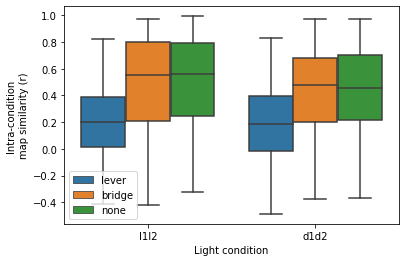

In [42]:
# correlations between 2 sets of trials
df = leverMapCor[leverMapCor.condition.isin(["l1l2","d1d2"])]
sns.boxplot(x="condition", y="r", hue = "rotation", data=df)
plt.ylabel("Intra-condition \nmap similarity (r)")
plt.xlabel("Light condition")
plt.legend(loc="lower left")
plt.show()

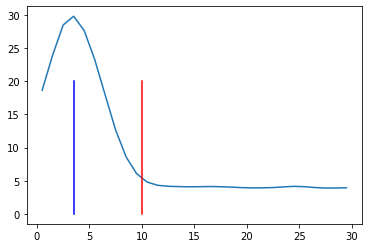

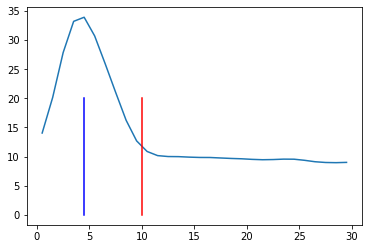

10


In [43]:
# threshold for the peak location in the rate-distance map
maxDistance= 10 # based on occupancy map, past 10 it is not where the mouse spend time around the lever

for cond in ["all_light","all_dark"]:
    meanOcc = np.nanmean(myLeverHistos[1][cond],axis=0) 
    plt.plot(myLeverHistos[2],meanOcc)
    peakLoc = myLeverHistos[2][np.argmax(meanOcc)]
    maxDist = maxDistance
    plt.plot([peakLoc,peakLoc],[0,20],color="blue")
    plt.plot([maxDist,maxDist],[0,20],color="red")
    plt.show()
    #maxDistance[cond] = maxDist
print(maxDistance)


Because this is based on histograms, we don't care about rotation.

In [44]:
# peak rate location for each neuron
peakLoc={}
peakHistoSignificance={}
for cond in ["all_light","all_dark"]:
    peakLoc[cond] = myLeverHistos[2][np.argmax(myLeverHistos[0][cond],axis=1)]
    peakHistoSignificance[cond] = np.nanmax(myLeverHistos[0][cond],axis=1) > myLeverHistos[3][cond]

In [45]:
peakHistoSignificance

{'all_light': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True, False, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, 

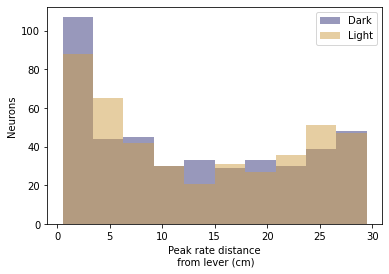

In [46]:
#plt.style.use("seaborn")
al=[0.5,0.5]
plt.hist(peakLoc["all_dark"],alpha=al[0],label="Dark",color=darkLightColors()[0])
plt.hist(peakLoc["all_light"],alpha=al[1],label="Light",color=darkLightColors()[1])
plt.ylabel("Neurons")
plt.xlabel("Peak rate distance\n from lever (cm)")
plt.legend()
plt.show()

We make our official plot for the figure.

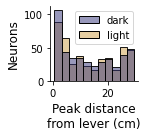

In [47]:
resLocDist = pd.DataFrame({"light":"dark",
             "peakLoc":peakLoc["all_dark"]})
resLocDist = resLocDist.append(pd.DataFrame({"light":"light",
             "peakLoc":peakLoc["all_light"]}))
resLocDist = resLocDist.reset_index()

## standard plot config

col=1
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
setFigureFontSizes()
gs = gridspec.GridSpec(1, 1, figure=fig) # all our figure

def peakDistributionPlot(gs):
    ax = fig.add_subplot(gs[0])
    g = sns.histplot(x="peakLoc",hue="light",data=resLocDist,palette=darkLightColors(),ax=ax)
    g.legend_.set_title("")
    ax.set_ylabel("Neurons")
    ax.set_xlabel("Peak distance\nfrom lever (cm)")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    

peakDistributionPlot(gs)

Is this significantly different from chance level where every value between 0-30 is as likely?

In [48]:
nCells=len(pyrId)
maxVal=30
nBins=11
maxDark = np.max(np.histogram(peakLoc["all_dark"],bins=nBins)[0])
maxLight = np.max(np.histogram(peakLoc["all_light"],bins=nBins)[0])
print(maxDark,maxLight)

107 88


60.0

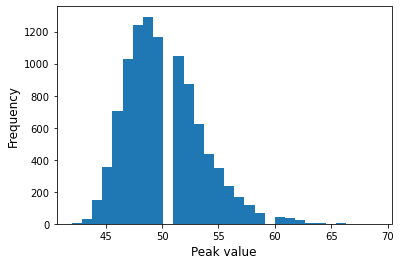

In [49]:
nIter=10000
res = np.empty(nIter)
for i in range(nIter):
    s = np.random.random_sample(nCells)*30
    res[i] = np.max(np.histogram(s,bins=nBins)[0])
plt.hist(res,bins=30)
plt.ylabel("Frequency")
plt.xlabel("Peak value")
np.quantile(res,.99)

The observed peaks for light and dark trials are above chance levels.

In [50]:
from scipy import stats



For each threshold, we get a 1 or 0.
We have 3 thresholds per cell*light*rotation combination

dict_keys(['all_light', 'all_dark'])
dict_keys(['none', 'lever', 'bridge'])
(438, 3)


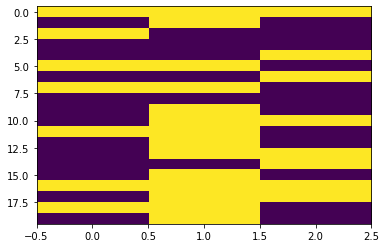

In [51]:
thresholdDict = {}
for light in ["all_light","all_dark"]:
    thresholdDict[light] = {}
    if light == "all_light":
        comb = "l1l2"
    elif light == "all_dark":
        comb = "d1d2"
    else:
        print("problem with condition")
        
    for rotType in ["none","lever","bridge"]:
        thresholdDict[light][rotType] = np.zeros((len(pyrId),3))
        
        thresholdDict[light][rotType][:,0] = peakRate[light][rotType] > 7.5
        thresholdDict[light][rotType][:,1] = leverMapCor.r[(leverMapCor.condition==comb)&(leverMapCor.rotation==rotType)]>0.4
        thresholdDict[light][rotType][:,2] = (peakLoc[light]<maxDistance) & (peakHistoSignificance[cond]) # 10
print(thresholdDict.keys())
print(thresholdDict["all_light"].keys())
print(thresholdDict["all_light"]["none"].shape)
plt.imshow(thresholdDict["all_light"]["bridge"][:20,:],aspect="auto")

In [52]:
leverCells={}
for light in ["all_light","all_dark"]:
    leverCells[light]={}
    for rotType in ["none","lever","bridge"]:
        indices = np.sum(thresholdDict[light][rotType],axis=1)==3 # 3 means the cell satisfied the 3 criteria
        leverCells[light][rotType] = pd.DataFrame({"id": pyrId[indices],
                                    "cellIndex": np.arange(len(pyrId))[indices]})

In [53]:
leverCells

{'all_light': {'none':                            id  cellIndex
  0     mn5824-20112020-0107_92          0
  13   mn5824-22112020-0107_130         13
  16   mn5824-22112020-0107_138         16
  27   mn5824-24112020-0107_114         27
  29   mn5824-02122020-0106_168         29
  ..                        ...        ...
  415   mn9686-01112021-0106_27        415
  419   mn9686-01112021-0106_37        419
  420   mn9686-01112021-0106_40        420
  435  mn9686-01112021-0106_197        435
  436  mn9686-01112021-0106_242        436
  
  [101 rows x 2 columns],
  'lever':                            id  cellIndex
  16   mn5824-22112020-0107_138         16
  27   mn5824-24112020-0107_114         27
  32     mn711-31012021-0107_47         32
  33     mn711-31012021-0107_48         33
  42     mn711-01022021-0107_75         42
  50    mn711-01022021-0107_131         50
  55     mn711-02022021-0108_51         55
  75     mn711-04022021-0107_43         75
  78     mn711-04022021-0107_92       

In [54]:
for light in ["all_light","all_dark"]:
    m = np.zeros((len(pyrId),3))
    for i,rotType in enumerate(["none","lever","bridge"]):
        m[:,i] = np.sum(thresholdDict[light][rotType],axis=1)==3
    indices = np.sum(m,axis=1)>0
    leverCells[light]["any"] = pd.DataFrame({"id": pyrId[indices],
                                 "cellIndex": np.arange(len(pyrId))[indices]})
    indices = np.sum(m,axis=1)==3
    leverCells[light]["all"] = pd.DataFrame({"id": pyrId[indices],
                                 "cellIndex": np.arange(len(pyrId))[indices]})
    

In [55]:
nCells=len(pyrId)
resSign = pd.DataFrame()
for light in ["dark","light"]:
    for rotType in ["none","lever","bridge"]:
        resSign = resSign.append(pd.DataFrame({"light":[light],
                                      "rotation": rotType,
                                      "sign": len(leverCells["all_"+light][rotType].cellIndex),
                                      "total": nCells}))
resSign["percent"] = resSign.sign/resSign.total*100
resSign["nonSign"] = resSign.total-resSign.sign
resSign = resSign.reset_index()


In [56]:
resSign

,index,light,rotation,sign,total,percent,nonSign
0,0,dark,none,108,438,24.657534,330
1,0,dark,lever,48,438,10.958904,390
2,0,dark,bridge,105,438,23.972603,333
3,0,light,none,101,438,23.059361,337
4,0,light,lever,42,438,9.589041,396
5,0,light,bridge,100,438,22.831050,338


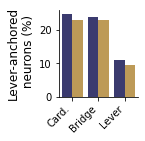

In [57]:
col=1
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 1, figure=fig) # all our figure

def percentLeverAnchoredFields(gs,showLegend=True):
    
    myDict={"xTicksValues": ["Card.","Bridge","Lever"]
           }

    ax = fig.add_subplot(gs[0])
    sns.barplot(x="rotation",y="percent",hue="light",data=resSign,order=["none","bridge","lever"],palette=darkLightColors())

    ax.set_ylabel("Lever-anchored\n neurons (%)")
    ax.set_xlabel("")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticklabels(myDict["xTicksValues"], rotation= 45,ha = "right")
    if showLegend:
        ax.legend(loc=0, frameon=False)
    else:
        ax.legend([],[],frameon=False)
percentLeverAnchoredFields(gs,showLegend=False)

In [58]:
LC = resSign.sign[(resSign.light=="light")&(resSign.rotation=="none")].values[0],resSign.nonSign[(resSign.light=="light")&(resSign.rotation=="none")].values[0]
DC = resSign.sign[(resSign.light=="dark")&(resSign.rotation=="none")].values[0],resSign.nonSign[(resSign.light=="dark")&(resSign.rotation=="none")].values[0]

LB = resSign.sign[(resSign.light=="light")&(resSign.rotation=="bridge")].values[0],resSign.nonSign[(resSign.light=="light")&(resSign.rotation=="bridge")].values[0]
DB = resSign.sign[(resSign.light=="dark")&(resSign.rotation=="bridge")].values[0],resSign.nonSign[(resSign.light=="dark")&(resSign.rotation=="bridge")].values[0]

LL = resSign.sign[(resSign.light=="light")&(resSign.rotation=="lever")].values[0],resSign.nonSign[(resSign.light=="light")&(resSign.rotation=="lever")].values[0]
DL = resSign.sign[(resSign.light=="dark")&(resSign.rotation=="lever")].values[0],resSign.nonSign[(resSign.light=="dark")&(resSign.rotation=="lever")].values[0]

print(LC,DC,LB,DB,LL,DL)

(101, 337) (108, 330) (100, 338) (105, 333) (42, 396) (48, 390)


In [59]:
from scipy.stats import chisquare

print("chi-square Cardinal / light-dark")
print(chisquare(f_obs = LC, f_exp= DC))
print("chi-square Bridge / light-dark")
print(chisquare(f_obs = LB, f_exp= DB))
print("chi-square Lever / light-dark")
print(chisquare(f_obs = LL, f_exp= DL))
print()

print("chi-square light Cardian-Lever")
print(chisquare(f_obs = LC, f_exp= LL))
print("chi-square dark Cardian-Lever")
print(chisquare(f_obs = DC, f_exp= DL))
print()
print("chi-square light Bridge-Lever")
print(chisquare(f_obs = LB, f_exp= LL))
print("chi-square dark Bridge-Lever")
print(chisquare(f_obs = DB, f_exp= DL))

print()
print("chi-square light Cardinal-Bridge")
print(chisquare(f_obs = LC, f_exp= LB))
print("chi-square dark Cardinal-Bridge")
print(chisquare(f_obs = DC, f_exp= DB))

chi-square Cardinal / light-dark
Power_divergenceResult(statistic=0.6021885521885522, pvalue=0.4377442105369701)
chi-square Bridge / light-dark
Power_divergenceResult(statistic=0.3131703131703132, pvalue=0.5757412392438876)
chi-square Lever / light-dark
Power_divergenceResult(statistic=0.8423076923076923, pvalue=0.3587376026969773)

chi-square light Cardian-Lever
Power_divergenceResult(statistic=91.67135642135642, pvalue=1.0233550458943606e-21)
chi-square dark Cardian-Lever
Power_divergenceResult(statistic=84.23076923076923, pvalue=4.4026512574004266e-20)

chi-square light Bridge-Lever
Power_divergenceResult(statistic=88.5901875901876, pvalue=4.8569245396634765e-21)
chi-square dark Bridge-Lever
Power_divergenceResult(statistic=76.01826923076923, pvalue=2.8105242428103466e-18)

chi-square light Cardinal-Bridge
Power_divergenceResult(statistic=0.012958579881656804, pvalue=0.9093679917553661)
chi-square dark Cardinal-Bridge
Power_divergenceResult(statistic=0.11274131274131274, pvalue=0.73

Save the list of lever cells

## What is the distribution of preferred direction for the lever-anchored fields?

We get the mean direction of the angular firing rate maps around the lever.

In [60]:
resMeanDir = pd.DataFrame()
for rotType in ["none","bridge","lever"]:
    for light in ["dark","light"]:
        indices = leverCells["all_"+light][rotType].cellIndex
        #myLeverMapsStats columns: mean_direction_rad, mean_direction_deg, mean_vector_length, peak_angle_rad, peak_rate
        meanDirection = myLeverMapsStats["angular"]["all_"+light][rotType][indices,0]
        resMeanDir = resMeanDir.append(pd.DataFrame({"light":light,
                                      "rotation":rotType,
                                      "meanDirection": meanDirection}))
resMeanDir = resMeanDir.reset_index()
resMeanDir

,index,light,rotation,meanDirection
0,0,dark,none,-0.697109
1,1,dark,none,-0.396162
2,2,dark,none,-2.187071
3,3,dark,none,-1.667975
4,4,dark,none,-2.898073
...,...,...,...,...
499,37,light,lever,-2.801555
500,38,light,lever,-3.125721
501,39,light,lever,0.227464
502,40,light,lever,1.771991


In [61]:
from  astropy.stats import rayleightest

In [62]:
for rotType in ["none","bridge","lever"]:
    for light in ["dark","light"]:
        print(rotType, light, "p-value:",rayleightest(resMeanDir.meanDirection[(resMeanDir.light==light)&(resMeanDir.rotation==rotType)]), "n:", len(resMeanDir.meanDirection[(resMeanDir.light==light)&(resMeanDir.rotation==rotType)]) )

none dark p-value: 0.8787711189594459 n: 108
none light p-value: 0.18169331855111023 n: 101
bridge dark p-value: 0.9722364477137957 n: 105
bridge light p-value: 0.3573592630387497 n: 100
lever dark p-value: 0.42317213536854725 n: 48
lever light p-value: 0.1955431004940088 n: 42


### plot with the distribution of mean directions

The distribution of mean direction are not significantly different from a a uniform distribution.

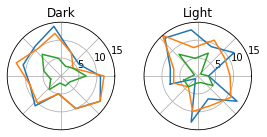

In [63]:
def plotDistCircularMean(gs):
    myDict = {"labels": {"none":"Cardinal","bridge":"Bridge","lever":"Lever"}}
    bins = np.linspace(-np.pi,np.pi,12)

    for i, light in enumerate(["dark","light"]):
        ax = fig.add_subplot(gs[i],polar=True)
        ax.set_title(light.capitalize())
        for rotType in ["none","bridge","lever"]:
            y,binEdges=np.histogram(resMeanDir.meanDirection[(resMeanDir.light==light)&(resMeanDir.rotation==rotType)],bins=bins)
            bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
            # wrap back to starting point
            y = np.append(y,y[0])
            bincenters = np.append(bincenters,bincenters[0])

            ax.plot(bincenters,y,'-',label="{}".format(myDict["labels"][rotType]))
        ax.set_xticklabels([])
        ax.set_ylim(0,15)
    #    if i == 0:
          #  ax.legend(loc = (0.5,-0.3), frameon=False)
        
        ax.grid(True)
col=2
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 2, figure=fig) # all our figure

plotDistCircularMean(gs)

## Summary so far

We can now plot our 2x2 figure summary.

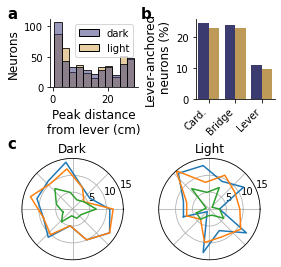

In [64]:
col=2
row=2
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(3, 2, figure=fig,height_ratios=[0.1,1,1])

gsDist = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[1,0])
peakDistributionPlot(gsDist)
gsSign = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[1,1])
percentLeverAnchoredFields(gsSign,showLegend=False)
gsMeanDir = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[2,:])
plotDistCircularMean(gsMeanDir)

gsLetter = gridspec.GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gsLetter[0])
ax.text(0.0,1.0, 'a', style='normal',fontsize=15, weight="bold")
ax.text(0.5,1.0, 'b', style='normal',fontsize=15, weight="bold")
ax.text(0.0,0.46, 'c', style='normal',fontsize=15, weight="bold")

ax.axis("off")
plt.show()

In [65]:
fn=myProject.dataPath+"/results/leverCells.pickle"
print("saving:",fn)
with open(fn, 'wb') as handle:
    pickle.dump(leverCells, handle)

saving: /adata/projects/autopi_ca1/results/leverCells.pickle


## Spatial coding in 3 different reference frames

We want to know in which reference frames spatial coding is the best.

We can look at correlation between 2 sets of independent trials. We can limit the analysis to the selected neurons or use all neurons.

In [66]:
df = leverMapCor[(leverMapCor.condition.isin(["l1l2","d1d2"]))]
df.condition[df.condition=="l1l2"]="Light"
df.condition[df.condition=="d1d2"]="Dark"
df.rotation[df.rotation=="lever"] = "Lever"
df.rotation[df.rotation=="bridge"] = "Bridge"
df.rotation[df.rotation=="none"] = "Card."
dfMapCor = df
dfMapCor.rename(columns = {'condition':'light'}, inplace = True)
dfMapCor

,rotation,light,r,cellId
2,Lever,Light,0.297386,mn5824-20112020-0107_92
5,Lever,Light,-0.188352,mn5824-20112020-0107_100
7,Lever,Light,0.049139,mn5824-20112020-0107_114
8,Lever,Light,-0.196701,mn5824-20112020-0107_116
9,Lever,Light,-0.088371,mn5824-20112020-0107_118
...,...,...,...,...
1243,Card.,Dark,0.314495,mn9686-01112021-0106_79
1244,Card.,Dark,0.446764,mn9686-01112021-0106_81
1255,Card.,Dark,0.787603,mn9686-01112021-0106_197
1266,Card.,Dark,0.678485,mn9686-01112021-0106_242


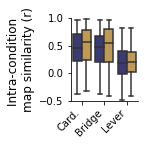

In [67]:
def plotMapCor(gs,dfMapCor, showLegend=False):
    ax = fig.add_subplot(gs[0])
    
    sns.boxplot(x="rotation", y="r", hue = "light", data=dfMapCor, order = ["Card.", "Bridge", "Lever"],hue_order=["Dark","Light"],palette=darkLightColors(),dodge=True)
    ax.set_ylabel("Intra-condition \nmap similarity (r)")
    ax.set_xlabel("")
    ax.set_xticklabels(["Card.", "Bridge", "Lever"],rotation= 45,ha = "right")
    if showLegend:
        ax.legend(title="",loc="lower left")
    else :
        ax.legend([],[],frameon=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(-0.5,1)

col=1
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 1, figure=fig)
plotMapCor(gs,dfMapCor)

We need to do stats on this.

In [68]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [69]:
dfMapCor

,rotation,light,r,cellId
2,Lever,Light,0.297386,mn5824-20112020-0107_92
5,Lever,Light,-0.188352,mn5824-20112020-0107_100
7,Lever,Light,0.049139,mn5824-20112020-0107_114
8,Lever,Light,-0.196701,mn5824-20112020-0107_116
9,Lever,Light,-0.088371,mn5824-20112020-0107_118
...,...,...,...,...
1243,Card.,Dark,0.314495,mn9686-01112021-0106_79
1244,Card.,Dark,0.446764,mn9686-01112021-0106_81
1255,Card.,Dark,0.787603,mn9686-01112021-0106_197
1266,Card.,Dark,0.678485,mn9686-01112021-0106_242


In [70]:
len(dfMapCor.cellId.unique())

438

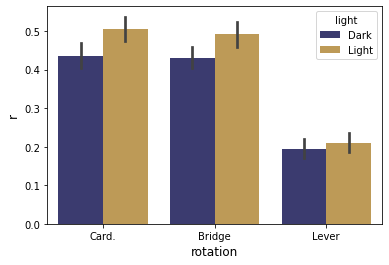

                          sum_sq      df           F        PR(>F)
C(light)                1.524936     1.0   15.824633  7.140669e-05
C(rotation)            40.212406     2.0  208.646944  1.030947e-84
C(light):C(rotation)    0.382544     2.0    1.984876  1.376076e-01
Residual              248.428234  2578.0         NaN           NaN
                  coef   std err          t         P>|t|  Conf. Int. Low  \
Card.-Bridge  0.004517  0.021171   0.213348  8.310726e-01       -0.036997   
Lever-Bridge -0.236729  0.021196 -11.168781  2.560756e-28       -0.278292   
Lever-Card.  -0.241246  0.021196 -11.381880  2.548061e-29       -0.282808   

              Conf. Int. Upp.     pvalue-sh  reject-sh  
Card.-Bridge         0.046031  8.310726e-01      False  
Lever-Bridge        -0.195167  5.121511e-28       True  
Lever-Card.         -0.199684  7.644183e-29       True  
               coef   std err         t     P>|t|  Conf. Int. Low  \
Light-Dark  0.06114  0.021146  2.891263  0.003869        0.

In [71]:
sns.barplot(hue = "light", y = "r", x = "rotation", data = dfMapCor,order = ["Card.","Bridge","Lever"],hue_order=["Dark","Light"],palette=darkLightColors())
plt.show()

#perform two-way ANOVA
model = ols('r ~ C(light) + C(rotation) + C(light):C(rotation)', data=dfMapCor).fit()
print(sm.stats.anova_lm(model, typ=2))

# significant light and significant rotation main effect
pw = model.t_test_pairwise("C(rotation)",method="sh")
print(pw.result_frame)

pw = model.t_test_pairwise("C(light)",method="sh")
print(pw.result_frame)


Now try with only cells that are selected as lever cells

In [72]:
df = pd.DataFrame()
myDict={"conditionName":{"light":"l1l2",
                        "dark":"d1d2"},
       "rotationName":{"none":"Card.",
                      "bridge":"Bridge",
                      "lever":"Lever"},
       "lightName":{"light":"Light",
                   "dark":"Dark"}}
for light in ["light","dark"]:
       for rotType in ["lever","bridge","none"]:
            cluIds = leverCells["all_"+light][rotType].id
            indices = (leverMapCor.condition==myDict["conditionName"][light])&(leverMapCor.rotation==rotType)&(leverMapCor.cellId.isin(cluIds))
            rVal = leverMapCor[indices].r
            df = df.append(pd.DataFrame({"light":myDict["lightName"][light],
                                        "rotation": myDict["rotationName"][rotType],
                                        "r": rVal}))
df

,light,rotation,r
22,Light,Lever,0.768041
41,Light,Lever,0.734313
73,Light,Lever,0.435814
74,Light,Lever,0.794047
102,Light,Lever,0.638058
...,...,...,...
1225,Dark,Card.,0.857779
1228,Dark,Card.,0.888761
1242,Dark,Card.,0.880808
1255,Dark,Card.,0.787603


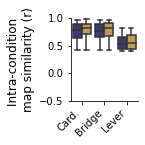

In [73]:
col=1
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 1, figure=fig)
plotMapCor(gs,df)

This plot shows that there was a threshold of 0.4 when selecting the lever cells.

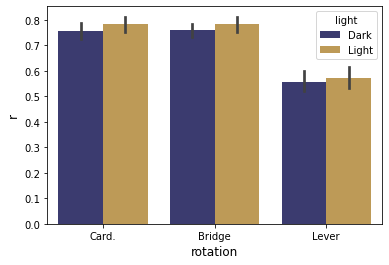

                         sum_sq     df          F        PR(>F)
C(light)               0.074604    1.0   3.480235  6.269369e-02
C(rotation)            3.091702    2.0  72.113092  3.131789e-28
C(light):C(rotation)   0.002465    2.0   0.057484  9.441431e-01
Residual              10.675370  498.0        NaN           NaN
                  coef   std err         t         P>|t|  Conf. Int. Low  \
Card.-Bridge -0.002782  0.020066 -0.138664  8.897719e-01       -0.042207   
Lever-Bridge -0.201109  0.025510 -7.883590  2.022875e-14       -0.251229   
Lever-Card.  -0.198326  0.025398 -7.808616  3.442748e-14       -0.248228   

              Conf. Int. Upp.     pvalue-sh  reject-sh  
Card.-Bridge         0.036642  8.897719e-01      False  
Lever-Bridge        -0.150989  6.068624e-14       True  
Lever-Card.         -0.148425  6.885496e-14       True  
                coef   std err         t    P>|t|  Conf. Int. Low  \
Light-Dark  0.023897  0.020458  1.168089  0.24333       -0.016298   

        

In [74]:
sns.barplot(hue = "light", y = "r", x = "rotation", data = df,order = ["Card.","Bridge","Lever"],hue_order=["Dark","Light"],palette=darkLightColors())
plt.show()

#perform two-way ANOVA
model = ols('r ~ C(light) + C(rotation) + C(light):C(rotation)', data=df).fit()
print(sm.stats.anova_lm(model, typ=2))

# significant light and significant rotation main effect
pw = model.t_test_pairwise("C(rotation)",method="sh")
print(pw.result_frame)

pw = model.t_test_pairwise("C(light)",method="sh")
print(pw.result_frame)


## Mean vector length in different rotation types at the lever

We can do a similar analysis but with the mean vector length instead of correlations. 

First using all pyramidal cells.

In [75]:
res = []
for light in ["all_light","all_dark"]:
    for ref in ["lever","bridge","none"]:
        res.append(pd.DataFrame({"cellId" : pyrId, 
                                 "rotation" : ref,
                                 "light": light,
                                 "vl": myLeverMapsStats["angular"][light][ref][:,2]}))
dfMvl = pd.concat(res)


dfMvl.light[dfMvl.light=="all_light"]="Light"
dfMvl.light[dfMvl.light=="all_dark"]="Dark"
dfMvl.rotation[dfMvl.rotation=="lever"] = "Lever"
dfMvl.rotation[dfMvl.rotation=="bridge"] = "Bridge"
dfMvl.rotation[dfMvl.rotation=="none"] = "Card."

dfMvl

,cellId,rotation,light,vl
0,mn5824-20112020-0107_92,Lever,Light,0.038501
1,mn5824-20112020-0107_100,Lever,Light,0.054228
2,mn5824-20112020-0107_114,Lever,Light,0.183845
3,mn5824-20112020-0107_116,Lever,Light,0.264628
4,mn5824-20112020-0107_118,Lever,Light,0.558155
...,...,...,...,...
433,mn9686-01112021-0106_79,Card.,Dark,0.036005
434,mn9686-01112021-0106_81,Card.,Dark,0.150584
435,mn9686-01112021-0106_197,Card.,Dark,0.353507
436,mn9686-01112021-0106_242,Card.,Dark,0.339365


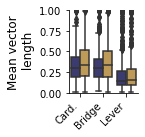

In [76]:
def plotMapMvl(gs,dfMapMvl, showLegend=False):
    ax = fig.add_subplot(gs[0])
    
    sns.boxplot(x="rotation", y="vl", hue = "light", data=dfMapMvl, order = ["Card.", "Bridge", "Lever"],hue_order=["Dark","Light"],palette=darkLightColors(),dodge=True)
    ax.set_ylabel("Mean vector\n length")
    ax.set_xlabel("")
    ax.set_xticklabels(["Card.", "Bridge", "Lever"],rotation= 45,ha = "right")
    if showLegend:
        ax.legend(title="",loc="lower left")
    else :
        ax.legend([],[],frameon=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0,1)

col=1
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 1, figure=fig)
plotMapMvl(gs,dfMvl)

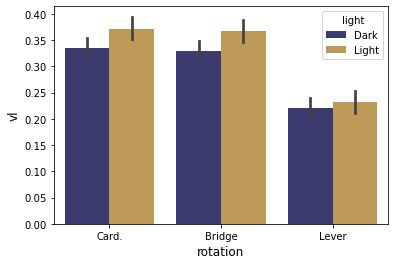

                          sum_sq      df          F        PR(>F)
C(light)                0.546321     1.0  12.100158  5.126307e-04
C(rotation)             8.858687     2.0  98.102980  9.019569e-42
C(light):C(rotation)    0.101690     2.0   1.126134  3.244458e-01
Residual              115.042047  2548.0        NaN           NaN
                  coef   std err         t         P>|t|  Conf. Int. Low  \
Card.-Bridge  0.005507  0.014602  0.377160  7.060862e-01       -0.023126   
Lever-Bridge -0.108708  0.014611 -7.440270  1.365930e-13       -0.137359   
Lever-Card.  -0.114216  0.014619 -7.812601  8.122688e-15       -0.142883   

              Conf. Int. Upp.     pvalue-sh  reject-sh  
Card.-Bridge         0.034141  7.060862e-01      False  
Lever-Bridge        -0.080058  2.731859e-13       True  
Lever-Card.         -0.085549  2.436806e-14       True  
                coef   std err         t     P>|t|  Conf. Int. Low  \
Light-Dark  0.038371  0.014551  2.637016  0.008415        0.009838 

In [78]:
sns.barplot(hue = "light", y = "vl", x = "rotation", data = dfMvl,order = ["Card.","Bridge","Lever"],hue_order=["Dark","Light"],palette=darkLightColors())
plt.show()

#perform two-way ANOVA
model = ols('vl ~ C(light) + C(rotation) + C(light):C(rotation)', data=dfMvl).fit()
print(sm.stats.anova_lm(model, typ=2))

# significant light and significant rotation main effect
pw = model.t_test_pairwise("C(rotation)",method="sh")
print(pw.result_frame)

pw = model.t_test_pairwise("C(light)",method="sh")
print(pw.result_frame)

Now only with the lever cells

In [59]:
leverCells["all_light"]["none"]

,id,cellIndex
0,mn5824-20112020-0107_92,0
13,mn5824-22112020-0107_130,13
16,mn5824-22112020-0107_138,16
27,mn5824-24112020-0107_114,27
29,mn5824-02122020-0106_168,29
...,...,...
415,mn9686-01112021-0106_27,415
419,mn9686-01112021-0106_37,419
420,mn9686-01112021-0106_40,420
435,mn9686-01112021-0106_197,435


In [60]:
df = pd.DataFrame()
myDict={"conditionName":{"light":"all_light",
                        "dark":"all_dark"},
       "rotationName":{"none":"Card.",
                      "bridge":"Bridge",
                      "lever":"Lever"},
       "lightName":{"light":"Light",
                   "dark":"Dark"}}
for light in ["light","dark"]:
       for rotType in ["lever","bridge","none"]:
            
            cluIndices = leverCells["all_"+light][rotType].cellIndex
            
            mvl = myLeverMapsStats["angular"][myDict["conditionName"][light]][rotType][cluIndices,2]
            
            df = df.append(pd.DataFrame({"light":myDict["lightName"][light],
                                        "rotation": myDict["rotationName"][rotType],
                                        "vl": mvl}))
dfMvlSel = df
dfMvlSel

,light,rotation,vl
0,Light,Lever,0.212470
1,Light,Lever,0.271141
2,Light,Lever,0.160229
3,Light,Lever,0.213170
4,Light,Lever,0.041591
...,...,...,...
103,Dark,Card.,0.278433
104,Dark,Card.,0.711561
105,Dark,Card.,0.401768
106,Dark,Card.,0.353507


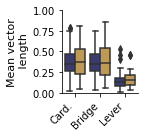

In [61]:
col=1
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 1, figure=fig)
plotMapMvl(gs,dfMvlSel)

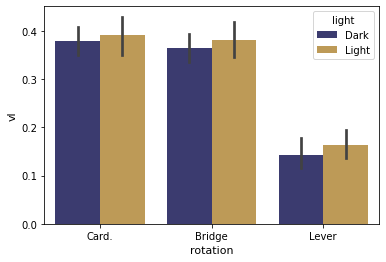

                         sum_sq     df          F        PR(>F)
C(light)               0.030728    1.0   1.097616  2.952981e-01
C(rotation)            3.790375    2.0  67.697592  9.842193e-27
C(light):C(rotation)   0.000953    2.0   0.017016  9.831280e-01
Residual              13.941463  498.0        NaN           NaN
                  coef   std err         t         P>|t|  Conf. Int. Low  \
Card.-Bridge  0.013403  0.022931  0.584477  5.591638e-01       -0.031651   
Lever-Bridge -0.221898  0.029152 -7.611723  1.365983e-13       -0.279174   
Lever-Card.  -0.235300  0.029025 -8.106873  4.059542e-15       -0.292327   

              Conf. Int. Upp.     pvalue-sh  reject-sh  
Card.-Bridge         0.058456  5.591638e-01      False  
Lever-Bridge        -0.164621  2.731966e-13       True  
Lever-Card.         -0.178274  1.217863e-14       True  
                coef   std err        t     P>|t|  Conf. Int. Low  \
Light-Dark  0.016561  0.023379  0.70838  0.479041       -0.029372   

        

In [62]:
sns.barplot(hue = "light", y = "vl", x = "rotation", data = dfMvlSel,order = ["Card.","Bridge","Lever"],hue_order=["Dark","Light"],palette=darkLightColors())
plt.show()

#perform two-way ANOVA
model = ols('vl ~ C(light) + C(rotation) + C(light):C(rotation)', data=dfMvlSel).fit()
print(sm.stats.anova_lm(model, typ=2))

# significant light and significant rotation main effect
pw = model.t_test_pairwise("C(rotation)",method="sh")
print(pw.result_frame)

pw = model.t_test_pairwise("C(light)",method="sh")
print(pw.result_frame)

# Summary of stats so far

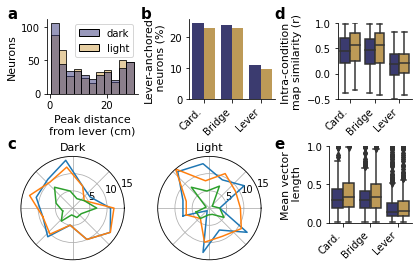

In [63]:
col=3
row=2
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(3, 3, figure=fig,height_ratios=[0.1,1,1])

gsDist = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[1,0])
peakDistributionPlot(gsDist)
gsSign = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[1,1])
percentLeverAnchoredFields(gsSign,showLegend=False)
gsMeanDir = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[2,:2])
plotDistCircularMean(gsMeanDir)
gsR = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[1,2])
plotMapCor(gsR,dfMapCor)
gsMvl = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[2,2])
plotMapMvl(gsMvl,dfMvl)



gsLetter = gridspec.GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gsLetter[0])
ax.text(0.0,1.0, 'a', style='normal',fontsize=15, weight="bold")
ax.text(0.33,1.0, 'b', style='normal',fontsize=15, weight="bold")
ax.text(0.0,0.46, 'c', style='normal',fontsize=15, weight="bold")
ax.text(0.66,1.0, 'd', style='normal',fontsize=15, weight="bold")
ax.text(0.66,0.46, 'e', style='normal',fontsize=15, weight="bold")


ax.axis("off")
plt.show()

## Put Cardinal and Bridge reference frames against each other

Now everyone wonders which one of cardinal or bridge is the best reference frame.

We can compare them in a within cell comparison.

In [64]:
from scipy.stats import wilcoxon,ttest_rel

myDict = {"lightNames":{"Light":"all_light",
                          "Dark":"all_dark"},
         "rotNames":{"Card.":"none",
                    "Bridge":"bridge",
                    "Lever": "lever"}}

cardBri = pd.DataFrame()

for light in ["Light", "Dark"]:
    
    df = dfMvl[(dfMvl.light == light)&(dfMvl.cellId.isin(leverCells[myDict["lightNames"][light]]["any"].id))]
    statistic, pval = ttest_rel(df[df.rotation=="Card."].vl, df[df.rotation=="Bridge"].vl)
    print(light, statistic, pval)
    myDiff = df[df.rotation=="Card."].vl - df[df.rotation=="Bridge"].vl
    cardBri = cardBri.append(pd.DataFrame({"light": light,
                                           "vlDiff": myDiff}))

cardBri = cardBri.reset_index()
cardBri

Light 2.4771180042925693 0.014840405382465796
Dark 4.3335523530069295 3.23715521033154e-05


,index,light,vlDiff
0,0,Light,0.021461
1,13,Light,-0.017078
2,16,Light,0.019077
3,27,Light,-0.011909
4,29,Light,-0.025887
...,...,...,...
213,418,Dark,-0.020341
214,421,Dark,0.009272
215,432,Dark,-0.036245
216,435,Dark,-0.027449


In [65]:
def plotCardBridgeDiff(gs,cardBri, showLegend=False):
    """
    We will plot light and dark on different plots
    """
    
    for i, light in enumerate(["Dark","Light"]):
        ax = fig.add_subplot(gs[i])
        #ax.set_title(light.capitalize())
        

        sns.histplot(data=cardBri[cardBri.light==light],x="vlDiff",color=darkLightColors()[i])
        
        w, p = wilcoxon(cardBri[cardBri.light==light].vlDiff)
      
        print(light,p)
        ax.plot([0,0],[0,24],color="black", linestyle="--")
        ax.set_ylabel("Neurons")
        ax.set_xlabel("MVL (Card. - Bridge)")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlim(-0.15,0.15)
        ax.set_ylim(0,28)
        ax.text(-0.1,25, formatPValue(p))
        ax.xaxis.set_label_coords(.45, -.2)


Dark 3.4751784661307846e-05
Light 0.013060582765207433


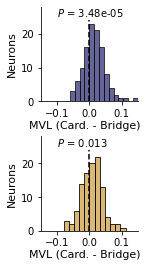

In [66]:
col=1
row=2
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(2, 1, figure=fig)
plotCardBridgeDiff(gs,cardBri)



Summary so far of the stats

Dark 3.4751784661307846e-05
Light 0.013060582765207433
saving /adata/projects/autopi_ca1/results/LeverMapsStats.pdf


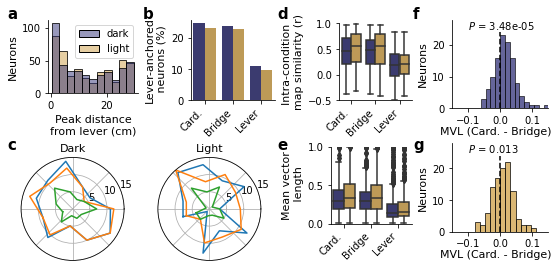

In [67]:
col=4
row=2
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(3, col, figure=fig,height_ratios=[0.1,1,1])

gsDist = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[1,0])
peakDistributionPlot(gsDist)
gsSign = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[1,1])
percentLeverAnchoredFields(gsSign,showLegend=False)
gsMeanDir = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[2,:2])
plotDistCircularMean(gsMeanDir)
gsR = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[1,2])
plotMapCor(gsR,dfMapCor)
gsMvl = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[2,2])
plotMapMvl(gsMvl,dfMvl)

gsDiff = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1:,3])
plotCardBridgeDiff(gsDiff,cardBri)



gsLetter = gridspec.GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gsLetter[0])
ax.text(0.0,1.0, 'a', style='normal',fontsize=15, weight="bold")
ax.text(0.25,1.0, 'b', style='normal',fontsize=15, weight="bold")
ax.text(0.0,0.46, 'c', style='normal',fontsize=15, weight="bold")
ax.text(0.5,1.0, 'd', style='normal',fontsize=15, weight="bold")
ax.text(0.5,0.46, 'e', style='normal',fontsize=15, weight="bold")
ax.text(0.75,1.0, 'f', style='normal',fontsize=15, weight="bold")
ax.text(0.75,0.46, 'g', style='normal',fontsize=15, weight="bold")
ax.axis("off")

#plt.show()

fn=myProject.dataPath+"/results/LeverMapsStats.pdf"
print("saving",fn)
plt.savefig(fn)

This figure is more informative than the previous one as it shows how many cells are lever-locked and the distribution of fields around the lever.

We need a scheme to explain what is the difference between Cardinal, Bridge and Lever reference frames. 
I prepared a figure in Inkscape that we can load using matplotlib.


/adata/projects/autopi_ca1/results/cardinal.png
/adata/projects/autopi_ca1/results/bridge.png
/adata/projects/autopi_ca1/results/lever.png


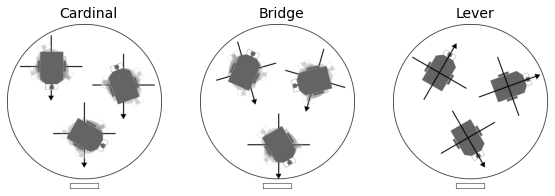

In [68]:
import matplotlib.image as img
  
    
col=4
row=1.75
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 1, figure=fig)

def plotSchematic(gs):

    gs = gridspec.GridSpecFromSubplotSpec(2, 5, subplot_spec= gs[0],height_ratios=[0.1,1],width_ratios=[2,0.4,2,0.4,2])

    for i, name in enumerate(["cardinal","bridge","lever"]):

        #gsTitle = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[0,i*2+1])
        #ax = fig.add_subplot(gsTitle[0])


        gsSch = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[1,i*2])
        ax = fig.add_subplot(gsSch[0])

        # reading png image file
        fn=myProject.dataPath+"/results/{}.png".format(name)
        print(fn)
        im = img.imread(fn)
        # show image
        ax.imshow(im)
        ax.axis('off')
        ax.text(500,-40,name.capitalize(),fontsize=14,horizontalalignment='center')
        ax.axis('off')
    
plotSchematic(gs)

# NEXT

We need to show that the maps are the same across quadrants

## Plotting functions that can be used to make the figures

In [69]:
def plotMap(ax,myMap,title="",titleY=0.95):
    """
    Plot one 2D map
    """
    ax.imshow(myMap.T,origin="lower",cmap='jet',interpolation=None)
    ax.set_title(title,y=titleY)
    ax.axis('off')
def plotAuto(ax,rate,time,title=""):
    ax.plot(time,rate)
    ax.set_ylim(0,np.max(rate))
    ax.set_ylabel("Spikes")
    ax.set_xlabel("Time (ms)")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title,y=1.06)
def leverPosition(ax,ses,light="light",title="",titleY=0.95,xlim=(-41,41),ylim=(-41,41)):
    """
    plot the lever position for some trials of a given light condition 
    """
    arenaX = np.cos(np.linspace(0-np.pi,np.pi,200))*40
    arenaY = np.sin(np.linspace(0-np.pi,np.pi,200))*40
    x = [t.lever.pose[0,0] for t in ses.trialList if t.valid and t.light==light]
    y = [t.lever.pose[0,1] for t in ses.trialList if t.valid and t.light==light]
    
    ax.scatter(x,y,s=3,label="Lever")
    ax.plot(arenaX,arenaY,c="gray")
    ax.plot(arenaX*0.9,arenaY*0.925,c="gray",linestyle="dashed")
    ax.set_aspect('equal')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(title,y=titleY)
    ax.axis('off')
    
    
def arenaQuadrant(ax):
    """
    plot arena and periphery
    """
    arenaX = np.cos(np.linspace(0-np.pi,np.pi,200))*40
    arenaY = np.sin(np.linspace(0-np.pi,np.pi,200))*40
    ax.plot(arenaX,arenaY,c="gray")
    ax.plot(arenaX*0.9,arenaY*0.925,c="gray",linestyle="dashed")
    ax.set_aspect('equal')
    ax.set_xlim(-41,41)
    ax.set_ylim(-51,41)
    #ax.set_title(title,y=titleY)
    ax.axis('off')
    
def plotRateLeverDistanceOccupancy(ax, myLeverHistos,cellIndex,light="all_light",title="",titleY=0.9,showXLabel=True):
    """
    rate and occupancy histograms as a function of distance from lever
    """
    ax.plot(myLeverHistos[2], myLeverHistos[0][light][cellIndex],color="blue")
    ax.set_ylabel("Rate (Hz)",color="blue")
    if showXLabel:
        ax.set_xlabel("Lever\n distance (cm)")
    else:
        ax.set_xlabel("")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title,y=titleY)
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(myLeverHistos[2], myLeverHistos[1][light][cellIndex],c="red")
    #ax2.set_ylim(0,np.max(myLeverHistos[1]["all_light"][cellIndex]))
    ax2.set_ylabel("Time (Sec)",color="red")
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    
def plotRateLeverDistance(ax, myLeverHistos,cellIndex,light="all_light",title="",titleY=0.9,showXLabel=True):
    """
    rate and occupancy histograms as a function of distance from lever
    """
    ax.plot(myLeverHistos[2], myLeverHistos[0][light][cellIndex])
    ax.set_ylabel("Rate (Hz)")
    if showXLabel:
        ax.set_xlabel("Lever dist.")
    else:
        ax.set_xlabel("")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title,y=titleY)
   
def mergeQuadMaps(mapNW, mapNE, mapSW, mapSE):
    """
    Merge 4 quadrant maps as one map
    """
    mapN = np.vstack([mapNW,mapNE])
    mapS = np.vstack([mapSW,mapSE])
    allMaps = np.hstack([mapS,mapN])
    return allMaps

def quadMapsCoord(ax,aMap):
    """
    plot the quadmap with coordinate system
    """
    ax.imshow(aMap.T,origin="lower",cmap='jet',interpolation=None)
    sizeX=aMap.T.shape[0]
    sizeY=aMap.T.shape[1]
    ax.plot([0,sizeX],[sizeY/2,sizeY/2],color="black")
    ax.plot([sizeX/2,sizeX/2],[0,sizeY],color="black")
    ax.text(0,sizeY-10,"NW")
    ax.text(0,0,"SW")
    ax.text(sizeX-15,sizeY-10,"NE")
    ax.text(sizeX-15,0,"SE")
    ax.axis('off')

def plotPathAtLever(ax,sSes,ses, rotType = "none", lightCond = "light",maxDistance=30,color="grey"):
    """
    Plot the animal path around the lever
    """
    sSes.ap.load_pose_from_file() # get original hd data, which file depends on what we used when calling prepareSessionsForSpatialAnalysis
    toLeverReferenceFrame(ses,sSes,maxDistance=maxDistance, rotationType=rotType,
                          invalidateSmallBridgeAngle=False,invalidateMaxAngle=np.pi/12)
    sSes.ap.set_intervals(ses.intervalDict[lightCond])
    ax.plot(sSes.ap.pose[:,1],sSes.ap.pose[:,2],color=color,linewidth=1)
    ax.set_aspect("equal")
    ax.axis('off')
    circleX = np.cos(np.arange(0,np.pi*2,0.01))*15
    circleY = np.sin(np.arange(0,np.pi*2,0.01))*15
    ax.plot(circleX,circleY,"--")
    
def plotLeverIFRMatrix(ax,cellId,light,showXLabel=True,sort=True):
    """
    Plot the matrix of rate per journey as a function of distance to lever
    """
    m = leverIFR[cellId]["matrix"]['all_{}_targetDistance'.format(light)]
    
    # sort matrix from shortest to longest distance from lever
    if sort:
        m["matrix"]= m["matrix"][np.argsort(-np.sum(np.isnan(m["matrix"]),axis=1))]
    
    ax.imshow(m['matrix'],aspect="auto",interpolation="none",extent=[np.min(m["bins"]),np.max(m["bins"]),0,m["matrix"].shape[0]],origin="lower",cmap="jet")
    ax.set_ylabel("Paths")
    if showXLabel:
        ax.set_xlabel("Lever dist.")
    else:
        ax.set_xlabel("")
    ax.yaxis.set_label_coords(-0.4, 0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

## Figure to introduce our lever-anchored firing fields 

We show that a neuron can have a field around the lever. 

The orientation of the lever map could be aligned to 

* Cardinal
* home direction
* lever orientation



We want to show a summary of a neuron. Light and dark plotted separately. The 3 reference frames separately.
We can try to use nested gridspecs for this purpose.

In [70]:



# plt.text(0.1,0.89, 'a', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
# plt.text(0.1,0.76, 'b', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
# plt.text(0.1,0.63, 'c', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
# plt.text(0.37,0.89, 'd', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
# plt.text(0.37,0.76, 'e', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
# plt.text(0.37,0.63, 'f', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)

# plt.text(0.1,0.49+.015, 'g', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
# plt.text(0.1,0.36+.015, 'h', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
# plt.text(0.1,0.23+.015, 'i', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
# plt.text(0.37,0.49+.015, 'j', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
# plt.text(0.37,0.36+.015, 'k', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
# plt.text(0.37,0.23+.015, 'l', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)

The code below can be used to get a pdf with the pyramidal cells in it. Good way to pick some example cells.

Some good looking lever cells

In [71]:
["mn5824-20112020-0107_92",
"mn711-01022021-0107_75",
"mn711-02022021-0108_51",
"mn711-03022021-0107",
"mn711-03022021-0107_101",
"mn2739-15022021-0105_178",
"mn2739-16022021-0106_198",
"mn2739-17022021-0106_107",
"mn3246-09042021-0106_196",
"mn3246-09042021-0106_210",
"mn3246-09042021-0106_218",
"mn3246-10042021-0106_252",
"mn3246-10042021-0106_258",
"mn3246-10042021-0106_262",
"mn3246-10042021-0106_276",
"mn1173-08052021-0107_115",
"mn5618-12072021-0110",
"mn5618-12072021-0110_16",
"mn5618-12072021-0110_568",
"mn9686-26102021-0106_232",
"mn9686-27102021-0106_27",
"mn9686-27102021-0106_59",
"mn9686-28102021-0107_10",
"mn9686-28102021-0107_46",
"mn9686-28102021-0107_178",
"mn9686-28102021-0107_226",
"mn9686-29102021-0106_10",
"mn9686-29102021-0106_30",
"mn9686-29102021-0106_230"]

['mn5824-20112020-0107_92',
 'mn711-01022021-0107_75',
 'mn711-02022021-0108_51',
 'mn711-03022021-0107',
 'mn711-03022021-0107_101',
 'mn2739-15022021-0105_178',
 'mn2739-16022021-0106_198',
 'mn2739-17022021-0106_107',
 'mn3246-09042021-0106_196',
 'mn3246-09042021-0106_210',
 'mn3246-09042021-0106_218',
 'mn3246-10042021-0106_252',
 'mn3246-10042021-0106_258',
 'mn3246-10042021-0106_262',
 'mn3246-10042021-0106_276',
 'mn1173-08052021-0107_115',
 'mn5618-12072021-0110',
 'mn5618-12072021-0110_16',
 'mn5618-12072021-0110_568',
 'mn9686-26102021-0106_232',
 'mn9686-27102021-0106_27',
 'mn9686-27102021-0106_59',
 'mn9686-28102021-0107_10',
 'mn9686-28102021-0107_46',
 'mn9686-28102021-0107_178',
 'mn9686-28102021-0107_226',
 'mn9686-29102021-0106_10',
 'mn9686-29102021-0106_30',
 'mn9686-29102021-0106_230']

## Figure about the field anchored to the lever

Aim:
1. Provide convincing evidence that some fields are anchored to the lever position during light and dark trials
2. Show which reference frames (Cardinal, home direction, lever orientation) better explain the lever fields.
3. Show that the lever fields are reliable in time and location of the lever.


### Example cells

We want to show examples of firing fields at the lever. 
We will show a total of 9 plots for each cell, all in one row. We will first write the code to show the graphs of one neuron.

I am restructuring the figure. We can start with trial examples, the firing rate as a function fo the lever distance, and the trial matrix as a function of lever distance.

In [72]:
def spikeOnPathSingleTrial(axes,cluId,trialList):
    """
    Plot the spikes on the animal path for some trials
    """
    
    myColorList=["green","blue","brown"]
    
    sessionName = cluId.split("_")[0]
    cluNumber = cluId.split("_")[1]
    ses = myProjectWithTrials.getSession(sessionName)
    sSes = [ ses for ses in sSesList if ses.name == sessionName][0]
    
    n = [ n for n in sSes.cg.neuron_list if n.name == cluNumber][0]
    
    for i,trialNo in enumerate(trialList):

        
            
        t = ses.trialList[trialNo]
        j = t.journeyList[-1]

        if i == 0:
            t.plotTrialSetup(axes,leverZones=False,homeBase=False,bridge=False)
        else:
            t.plotTrialSetup(axes, arena=False,leverZones=False,homeBase=False,bridge=False)
            
        inter = np.array([[j.startTime,j.endTime]])
        sSes.ap.unset_intervals()
        inter = RosToResTime(inter.flatten(),np.stack([sSes.ap.pose[:,0],sSes.ap.pose[:,7]],axis=1)).reshape((-1,2))
        n.spike_train.set_intervals(inter)
        sSes.ap.set_intervals(inter)
        n.spatial_properties.spike_position()
        n.spatial_properties.spike_posi

        axes.plot(j.navPaths["all"].pPose[:,0],j.navPaths["all"].pPose[:,1],color="gray",alpha=0.5)
        axes.scatter(n.spatial_properties.spike_posi[:,0],n.spatial_properties.spike_posi[:,1],color=myColorList[i],s=10)
        
    axes.axis("off")

/adata/projects/autopi_ca1/results/leverFieldSpikeOnPath.png


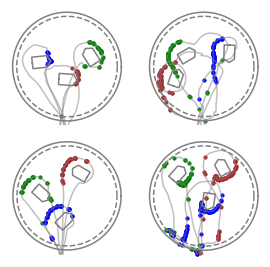

In [73]:
cellDict = {"light" :  {"cellIds":["mn9686-28102021-0107_178","mn9686-29102021-0106_230"],
                        "trialLists":([20,76,8],[4,5,34])},
           "dark" : {"cellIds": [ "mn9686-28102021-0107_31", "mn711-01022021-0107_75"],
                    "trialLists":([15,37,69],[11,37,59])}
           }
col=2
row=2
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = gridspec.GridSpec(2, 2, figure=fig)

for j,light in enumerate(["light","dark"]):
    for i in range(2):
        axes = fig.add_subplot(gs[i, j]) # add an axes to the figure
        cluId = cellDict[light]["cellIds"][i]
        trialList=cellDict[light]["trialLists"][i]
        spikeOnPathSingleTrial(axes,cluId,trialList)


figName=myProject.dataPath+"/results/leverFieldSpikeOnPath.png"
print(figName)
plt.savefig(figName)

In [74]:
def exampleCell3(gs,cellId,light,trialList):
    gsPlan = gridspec.GridSpecFromSubplotSpec(2, 3, subplot_spec=gs[0], height_ratios=[0.1,1]) # to get space for titles between rows
    cellIndex = pyrId[pyrId==cellId].index.item()
    ####
    #### first row
    ####
    # 2D standard map
    
    gsMap = gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=gsPlan[1,0],width_ratios=[0.9,0.02]) # we spit into 11 to shift the arena left
    axes = fig.add_subplot(gsMap[0])
    
    spikeOnPathSingleTrial(axes,cellId,trialList)
    
    
    #plotMap(ax = ax, myMap = myMaps[light][cellIndex][:,16:],
    #        title="{:.1f} Hz".format(np.nanmax(myMaps[cond][cellIndex])),
    #        titleY=0.90)

    # Firing rate as a function of lever distance
    gsRD = gridspec.GridSpecFromSubplotSpec(1,1 , subplot_spec=gsPlan[1,1])
    ax = fig.add_subplot(gsRD[0])
    allCond="all_"+light
    plotRateLeverDistance(ax=ax,myLeverHistos=myLeverHistos,cellIndex=cellIndex,light=allCond,
                          title="",titleY=1.0,showXLabel=True)

    # Path matrix with distance from lever
    gsJ = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[1,2])
    ax = fig.add_subplot(gsJ[0])
    plotLeverIFRMatrix(ax,cellId,light,showXLabel=True,) 


dark mn711-01022021-0107_75 [11, 37, 59]


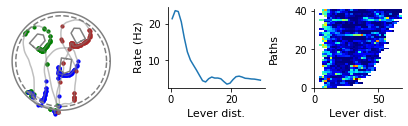

In [75]:
col=3
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = gridspec.GridSpec(1, 1, figure=fig)

cellDict = {"light" :  {"cellIds":["mn9686-28102021-0107_178","mn9686-29102021-0106_230"],
                        "trialLists":([20,76,8],[4,5,34])},
           "dark" : {"cellIds": [ "mn9686-28102021-0107_31", "mn711-01022021-0107_75"],
                    "trialLists":([15,37,69],[11,37,59])}
           }

light = "dark"
cellId = cellDict[light]["cellIds"][1]
trialList = cellDict[light]["trialLists"][1]
print(light,cellId,trialList)


exampleCell3(gs,cellId,light,trialList)

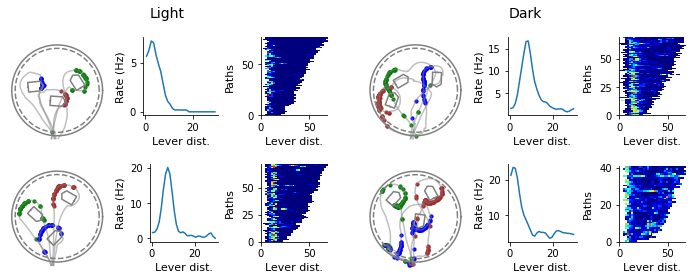

In [76]:
def exampleCell3Multi(gs):
   
    cellDict = {"light" :  {"cellIds":["mn9686-28102021-0107_178","mn9686-29102021-0106_230"],
                        "trialLists":([20,76,8],[4,5,34])},
               "dark" : {"cellIds": [ "mn9686-28102021-0107_31", "mn711-01022021-0107_75"],
                    "trialLists":([15,37,69],[11,37,59])}
               }
    
    gsPlan = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs[0], height_ratios=[0.05,1,1], width_ratios=[1,0.1,1]) # to get space for titles between rows
    
    gsLetter = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[0], width_ratios=[1,0.1,1]) # to get space for titles between rows
    
    for i, light in enumerate(["light","dark"]):
        # put the light and dark titles
        ax = fig.add_subplot(gsLetter[i*2])
        ax.text(0.5,1.5,light.capitalize(),fontsize=14,horizontalalignment='center')
        ax.axis("off")
    
        for j in range(2):        
            gsOneCell = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gsPlan[1+j,i*2]) # space for one cell
            
            cellId = cellDict[light]["cellIds"][j]
            trialList = cellDict[light]["trialLists"][j]
            #print(light,cellId,trialList)
            exampleCell3(gsOneCell,cellId,light,trialList)

col=5
row=2
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = gridspec.GridSpec(1, 1, figure=fig)

exampleCell3Multi(gs)

/adata/projects/autopi_ca1/results/cardinal.png
/adata/projects/autopi_ca1/results/bridge.png
/adata/projects/autopi_ca1/results/lever.png


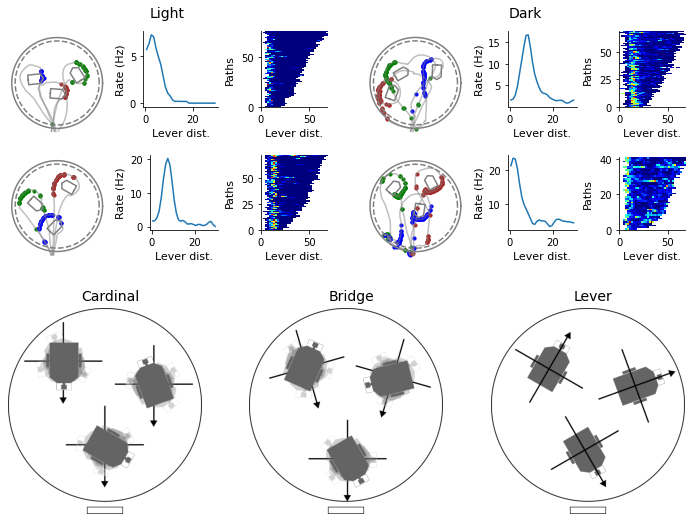

In [77]:
col=5
row=4
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = gridspec.GridSpec(1, 1, figure=fig)

gsPlan = gridspec.GridSpecFromSubplotSpec(5, 2, subplot_spec=gs[0], height_ratios=[0.1,1,1,1,1], width_ratios=[1,1]) # to get space for titles between rows

gsEx = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[1:3,:]) # to get space for titles between rows
exampleCell3Multi(gsEx)


gsSch = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[3:,:]) # to get space for titles between rows
plotSchematic(gsSch)


In [78]:
def plotLeverCenter(gs,cellId,light):
    
    gsPlan = gridspec.GridSpecFromSubplotSpec(2, 8, subplot_spec=gs[0], height_ratios=[0.1,1], width_ratios=[1,1,0.4,1,1,0.4,1,1]) # to get space for titles between rows
    cellIndex = pyrId[pyrId==cellId].index.item()
    allCond="all_"+light
    
    for i,(ref,refTitle) in  enumerate(zip(["none","bridge","lever"],["Cardinal","Bridge","Lever"])):
        
        # put the Cardinal,Bridge and Lever titles
       # ax = fig.add_subplot(gsLetter[i*2])
        #ax.text(0.5,1.3,light.capitalize(),fontsize=14,horizontalalignment='center')
        #ax.axis("off")
        
        
        ax = fig.add_subplot(gsPlan[1,i*3])
        rateType="map"
        plotMap(ax = ax, myMap = myLeverMaps[rateType][allCond][ref][cellIndex],
               title="{:.1f} Hz".format(np.nanmax(myLeverMaps[rateType][allCond][ref][cellIndex])),
               titleY=0.98)

        gsPolar = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[1,i*3+1])
        ax = fig.add_subplot(gsPolar[0],polar=True)

        rateType="angular"
        ax.plot(np.append(np.arange(-np.pi,np.pi,2*np.pi/36),-np.pi),
                np.append(myLeverMaps[rateType][allCond][ref][cellIndex],myLeverMaps[rateType][allCond][ref][cellIndex][0]))
        ax.set_xticklabels([])
        ax.set_title("{:.2f} vl, {:.1f} Hz".format(myLeverMapsStats[rateType][allCond][ref][cellIndex,2],myLeverMapsStats[rateType][allCond][ref][cellIndex,4]),y=0.98)
        ax.grid(True)

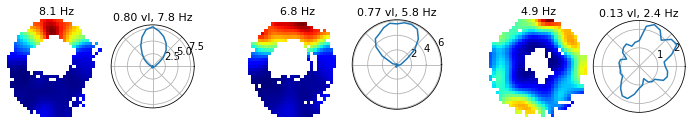

In [79]:
col=5
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = gridspec.GridSpec(1, 1, figure=fig)
cellId = "mn711-03022021-0107_101"
light = "light"

plotLeverCenter(gs,cellId,light)

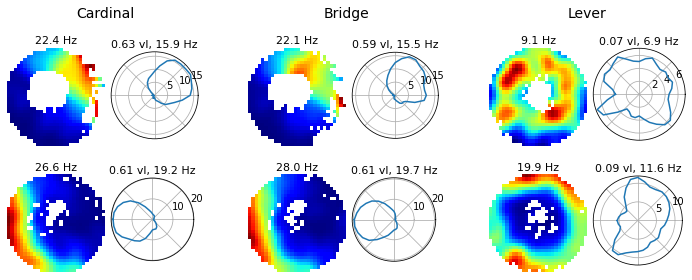

In [80]:
col=5
row=2
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = gridspec.GridSpec(1, 1, figure=fig)

def plotLeverCenterExamples(gs):
    gsPlan = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[0],height_ratios=[0.05,1,1])
    gsLetter = gridspec.GridSpecFromSubplotSpec(1, 5, subplot_spec=gs[0], height_ratios=[1], width_ratios=[2,0.4,2,0.4,2]) 
    
    for i, name in enumerate(["Cardinal","Bridge", "Lever"]):
        ax = fig.add_subplot(gsLetter[i*2])
        ax.text(0.5,1.5,name,fontsize=14,horizontalalignment='center')
        ax.axis("off")
    
    
    cellDict = {"light" :  ["mn9686-28102021-0107_178","mn9686-29102021-0106_230", "mn3246-09042021-0106_218","mn9686-28102021-0107_10"],
               "dark" : [ "mn9686-28102021-0107_31", "mn711-01022021-0107_75","mn9686-27102021-0106_257", "mn711-02022021-0108_51"]}
    for j,light in enumerate(["light","dark"]):
        for i in range(1):
            gsOne = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[j+i+1])
            cellId = cellDict[light][i]
            plotLeverCenter(gsOne,cellId,light)

plotLeverCenterExamples(gs)

/adata/projects/autopi_ca1/results/cardinal.png
/adata/projects/autopi_ca1/results/bridge.png
/adata/projects/autopi_ca1/results/lever.png


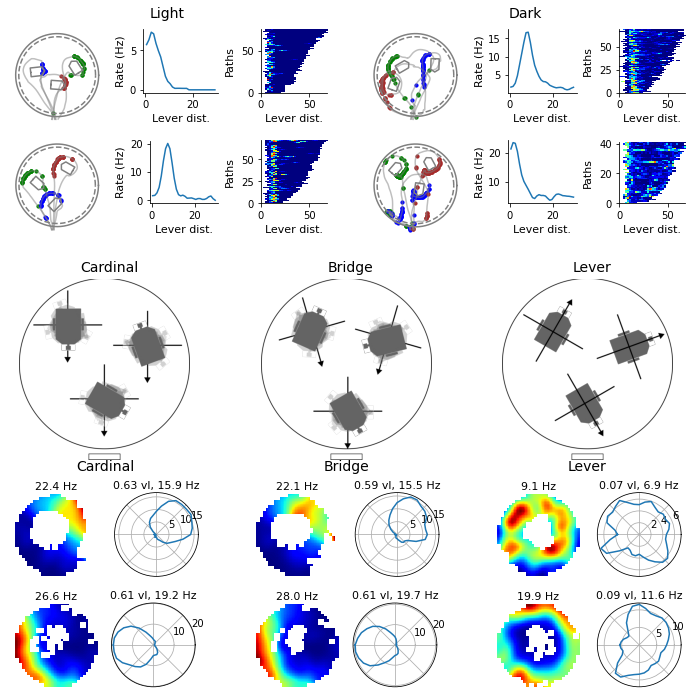

In [81]:
col=5
row=6.2
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = gridspec.GridSpec(1, 1, figure=fig)

gsPlan = gridspec.GridSpecFromSubplotSpec(8, 1, subplot_spec=gs[0], height_ratios=[0.1,1,1,1,1,1,1,1]) # to get space for titles between rows

gsEx = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[1:3]) # to get space for titles between rows
exampleCell3Multi(gsEx)


gsSch = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[3:5]) # to get space for titles between rows
gsSch1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsSch[0]) # to get space for titles between rows
plotSchematic(gsSch1)

gsEx2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[5:7]) # to get space for titles between rows
plotLeverCenterExamples(gsEx2)


We can get a 3 x 3 plot for each cell and place 2 example cells next to each other to get 6 columns.

It will be easier to organaize a 6 columns figure for the statistics.

In [82]:
def exampleCell33(gs,cellId,light):
    gsPlan = gridspec.GridSpecFromSubplotSpec(6, 3, subplot_spec=gs[0], height_ratios=[0.1,1,0.8,1.2,0.1,1]) # to get space for titles between rows
    cellIndex = pyrId[pyrId==cellId].index.item()
    ####
    #### first row
    ####
    # 2D standard map
    gsMap = gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=gsPlan[1,0],width_ratios=[0.9,0.02]) # we spit into 11 to shift the arena left
    ax = fig.add_subplot(gsMap[0])
    plotMap(ax = ax, myMap = myMaps[light][cellIndex][:,16:],
            title="{:.1f} Hz".format(np.nanmax(myMaps[cond][cellIndex])),
            titleY=0.90)

    # Firing rate as a function of lever distance
    gsRD = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gsPlan[1,1], width_ratios=[0.05,0.6,0.3], height_ratios=[0.001,0.7,0.3])
    ax = fig.add_subplot(gsRD[1,1])
    allCond="all_"+light
    plotRateLeverDistance(ax=ax,myLeverHistos=myLeverHistos,cellIndex=cellIndex,light=allCond,
                          title="",titleY=1.0,showXLabel=True)

    # Path matrix with distance from lever
    gsJ = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gsPlan[1,2], width_ratios=[0.4,1.0,0.0],height_ratios=[0.001,0.7,0.3] )
    ax = fig.add_subplot(gsJ[1,1])
    plotLeverIFRMatrix(ax,cellId,light,showXLabel=True,)
    ###
    ### Second and third row
    ###
    for i,(ref,refTitle) in  enumerate(zip(["none","bridge","lever"],["Cardinal","Home direction","Lever orientation"])):
        ax = fig.add_subplot(gsPlan[3,i])
        rateType="map"
        plotMap(ax = ax, myMap = myLeverMaps[rateType][allCond][ref][cellIndex],
               title="{:.1f} Hz".format(np.nanmax(myLeverMaps[rateType][allCond][ref][cellIndex])),
               titleY=0.98)

        gsPolar = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[5,i])
        ax = fig.add_subplot(gsPolar[0],polar=True)

        rateType="angular"
        ax.plot(np.append(np.arange(-np.pi,np.pi,2*np.pi/36),-np.pi),
                np.append(myLeverMaps[rateType][allCond][ref][cellIndex],myLeverMaps[rateType][allCond][ref][cellIndex][0]))
        ax.set_xticklabels([])
        ax.set_title("{:.2f} vl, {:.1f} Hz".format(myLeverMapsStats[rateType][allCond][ref][cellIndex,2],myLeverMapsStats[rateType][allCond][ref][cellIndex,4]),y=0.98)
        ax.grid(True)
    ###
    ### titles
    ###
    for i, title in enumerate(["Cardinal","Bridge","Lever-ori."]):
        ax = fig.add_subplot(gsPlan[2,i])
        ax.text(0.5,0.2,title, fontsize=14,horizontalalignment='center')
        ax.axis('off')

    ax = fig.add_subplot(gs[0])
    ax.text(0.02,0.97, 'i', style='normal',fontsize=12, weight="bold")
    ax.text(0.25,0.97, 'ii', style='normal',fontsize=12, weight="bold")
    ax.text(0.67,0.97, 'iii', style='normal',fontsize=12, weight="bold")
    ax.text(0.02,0.635, 'iiii', style='normal',fontsize=12, weight="bold")
    #ax.text(1,1, 'x', style='normal',fontsize=12, weight="bold")
    ax.axis('off')

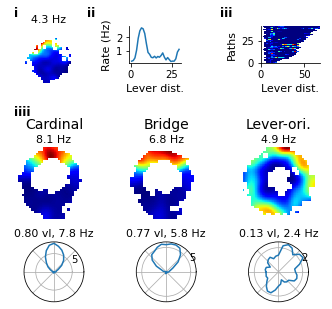

In [83]:
col=3
row=3
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=False) # create the overall figure to put all the axes on
gs = gridspec.GridSpec(1, 1, figure=fig)
cellId = "mn711-03022021-0107_101"
light = "light"

exampleCell33(gs,cellId,light)

saving in /adata/projects/autopi_ca1/results/leverExamples.pdf


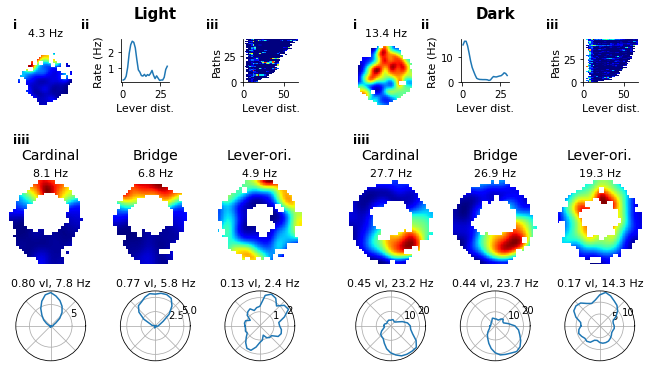

In [84]:
col=6
row=3.5
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=False) # create the overall figure to put all the axes on
gs = gridspec.GridSpec(1, 1, figure=fig)

def exampleTwoCells(gs):
    ## first cell
    gsOne = gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=gs[0],width_ratios=[1.05,1])
    gsOne1 = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gsOne[0])
    ax = fig.add_subplot(gsOne1[0])
    ax.text(0.5,1.0, 'Light', style='normal',fontsize=15, weight="bold",horizontalalignment='center')
    ax.axis('off')

    cellId = "mn711-03022021-0107_101" #"mn9686-29102021-0106_230"
    light = "light"
    exampleCell33(gsOne1,cellId,light)

    ## second cell
    gsTwo = gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=gs[0],width_ratios=[1,1.05])
    gsTwo1 = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gsTwo[1])
    ax = fig.add_subplot(gsTwo1[0])
    ax.text(0.5,1.0, 'Dark', style='normal',fontsize=15, weight="bold",horizontalalignment='center')
    ax.axis('off')

    cellId = "mn711-02022021-0108_51"
    light = "dark"
    exampleCell33(gsTwo1,cellId,light)
    
exampleTwoCells(gs)


figName=myProject.dataPath+"/results/leverExamples.pdf"
print("saving in",figName)
plt.savefig(figName)  # saves the current figure into a pdf page


Dark 3.4751784661307846e-05
Light 0.013060582765207433


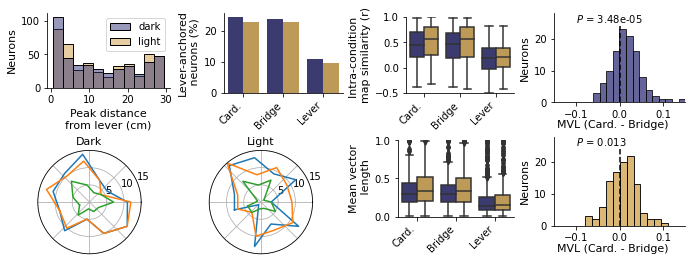

In [85]:
col=5
row=2
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 1, figure=fig)


def plotStats(gs):

    gsPlan = gridspec.GridSpecFromSubplotSpec(3,4, subplot_spec=gs[0],height_ratios=[0.1,1,1])


    gsDist = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[1,0])
    peakDistributionPlot(gsDist)
    gsSign = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[1,1])
    percentLeverAnchoredFields(gsSign,showLegend=False)
    gsMeanDir = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gsPlan[2,:2])
    plotDistCircularMean(gsMeanDir)
    gsR = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[1,2])
    plotMapCor(gsR,dfMapCor)
    gsMvl = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[2,2])
    plotMapMvl(gsMvl,dfMvl)

    gsDiff = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gsPlan[1:,3])
    plotCardBridgeDiff(gsDiff,cardBri)


    #gsLetter = gridspec.GridSpec(1, 1, figure=fig)
    #ax = fig.add_subplot(gsLetter[0])
    #ax.text(0.0,1.0, 'a', style='normal',fontsize=15, weight="bold")
    #ax.text(0.25,1.0, 'b', style='normal',fontsize=15, weight="bold")
    #ax.text(0.0,0.46, 'c', style='normal',fontsize=15, weight="bold")
    #ax.text(0.5,1.0, 'd', style='normal',fontsize=15, weight="bold")
    #ax.text(0.5,0.46, 'e', style='normal',fontsize=15, weight="bold")
    #ax.text(0.75,1.0, 'f', style='normal',fontsize=15, weight="bold")
    #ax.text(0.75,0.46, 'g', style='normal',fontsize=15, weight="bold")
    #ax.axis("off")

plotStats(gs)

Dark 3.4751784661307846e-05
Light 0.013060582765207433


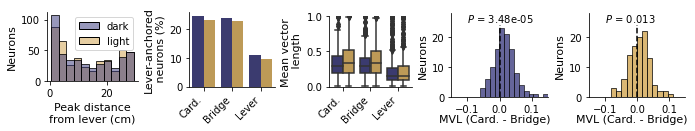

In [86]:
col=5
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 1, figure=fig)


def plotStatsSimpler(gs):

    gsPlan = gridspec.GridSpecFromSubplotSpec(2,5, subplot_spec=gs[0],height_ratios=[0.1,1])


    gsDist = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[1,0])
    peakDistributionPlot(gsDist)
    
    gsSign = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[1,1])
    percentLeverAnchoredFields(gsSign,showLegend=False)
    
    gsMvl = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[1,2])
    plotMapMvl(gsMvl,dfMvl)

    gsDiff = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gsPlan[1,3:])
    plotCardBridgeDiff(gsDiff,cardBri)


plotStatsSimpler(gs)

Prepare examples of neurons for our figure using the function developped above.

/adata/projects/autopi_ca1/results/cardinal.png
/adata/projects/autopi_ca1/results/bridge.png
/adata/projects/autopi_ca1/results/lever.png
Dark 3.4751784661307846e-05
Light 0.013060582765207433
saving in /adata/projects/autopi_ca1/results/leverFigureWithSchematic.pdf


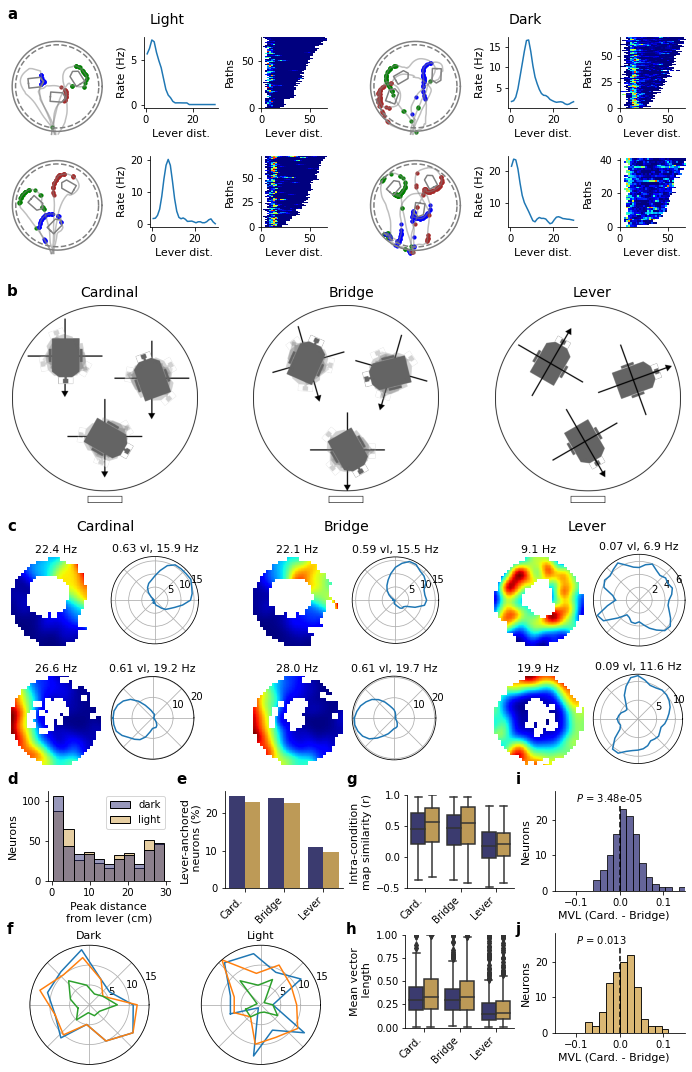

In [87]:
col=5
row=8.2
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = gridspec.GridSpec(1, 1, figure=fig)

gsPlan = gridspec.GridSpecFromSubplotSpec(11, 1, subplot_spec=gs[0], height_ratios=[0.1,1,1,1,1,0.15,1,1,0.05,1.2,1.2]) # to get space for titles between rows




gsEx = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[1:3]) # to get space for titles between rows
exampleCell3Multi(gsEx)

gsSch = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[3:5]) # to get space for titles between rows
gsSch1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsSch[0]) # to get space for titles between rows
plotSchematic(gsSch1)

gsEx2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[6:8]) # to get space for titles between rows
plotLeverCenterExamples(gsEx2)

gsStats = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[9:]) # to get space for titles between rows
plotStats(gsStats)



gsLetter = gridspec.GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gsLetter[0])
ax.text(0.0,1.0, 'a', style='normal',fontsize=15, weight="bold")
ax.text(0.0,0.735, 'b', style='normal',fontsize=15, weight="bold")
ax.text(0.0,0.51, 'c', style='normal',fontsize=15, weight="bold")


ax.text(0.0,0.268, 'd', style='normal',fontsize=15, weight="bold")
ax.text(0.25,0.268, 'e', style='normal',fontsize=15, weight="bold")
ax.text(0.0,0.125, 'f', style='normal',fontsize=15, weight="bold")
ax.text(0.50,0.268, 'g', style='normal',fontsize=15, weight="bold")
ax.text(0.50,0.125, 'h', style='normal',fontsize=15, weight="bold")
ax.text(0.75,0.268, 'i', style='normal',fontsize=15, weight="bold")
ax.text(0.75,0.125, 'j', style='normal',fontsize=15, weight="bold")


ax.axis("off")

figName=myProject.dataPath+"/results/leverFigureWithSchematic.pdf"
print("saving in",figName)
plt.savefig(figName)  # saves the current figure into a pdf page
#plt.close()

Version of the figure with simpler statistics.

/adata/projects/autopi_ca1/results/cardinal.png
/adata/projects/autopi_ca1/results/bridge.png
/adata/projects/autopi_ca1/results/lever.png
Dark 3.4751784661307846e-05
Light 0.013060582765207433
saving in /adata/projects/autopi_ca1/results/leverFigureWithSchematic.png


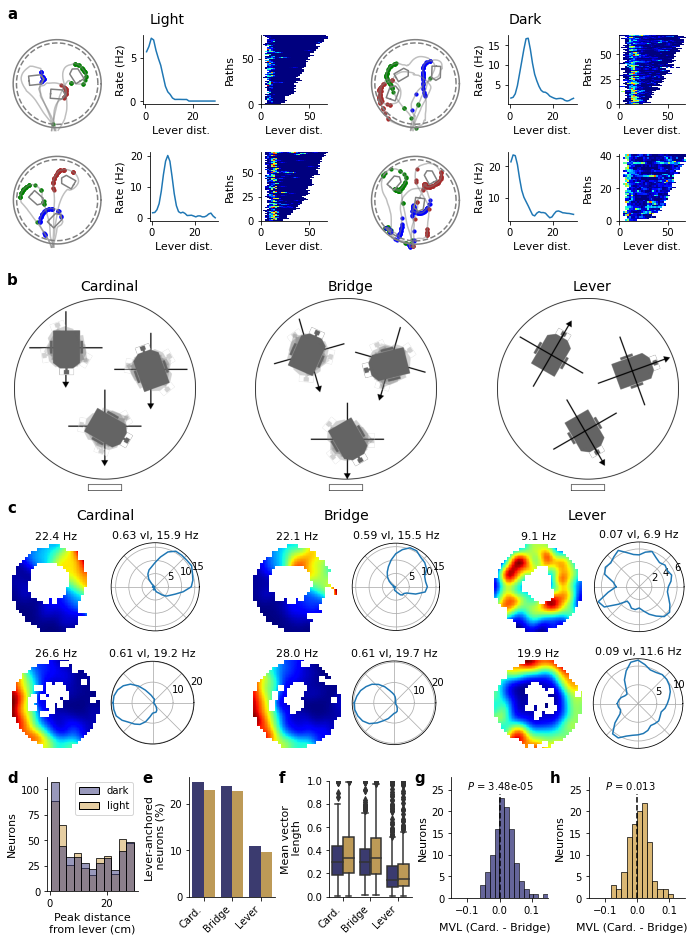

In [89]:
col=5
row=7.2
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = gridspec.GridSpec(1, 1, figure=fig)

gsPlan = gridspec.GridSpecFromSubplotSpec(10, 1, subplot_spec=gs[0], height_ratios=[0.1,1,1,1,1,0.15,1,1,0.05,1.5]) # to get space for titles between rows




gsEx = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[1:3]) # to get space for titles between rows
exampleCell3Multi(gsEx)

gsSch = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[3:5]) # to get space for titles between rows
gsSch1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsSch[0]) # to get space for titles between rows
plotSchematic(gsSch1)

gsEx2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[6:8]) # to get space for titles between rows
plotLeverCenterExamples(gsEx2)

gsStats = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlan[9:]) # to get space for titles between rows
plotStatsSimpler(gsStats)



gsLetter = gridspec.GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gsLetter[0])
ax.text(0.0,1.0, 'a', style='normal',fontsize=15, weight="bold")
ax.text(0.0,0.71, 'b', style='normal',fontsize=15, weight="bold")
ax.text(0.0,0.46, 'c', style='normal',fontsize=15, weight="bold")


ax.text(0.0,0.165, 'd', style='normal',fontsize=15, weight="bold")
ax.text(0.20,0.165, 'e', style='normal',fontsize=15, weight="bold")
ax.text(0.40,0.165, 'f', style='normal',fontsize=15, weight="bold")
ax.text(0.60,0.165, 'g', style='normal',fontsize=15, weight="bold")
ax.text(0.80,0.165, 'h', style='normal',fontsize=15, weight="bold")


ax.axis("off")

figName=myProject.dataPath+"/results/leverFigureWithSchematic.png"
print("saving in",figName)
plt.savefig(figName)  # saves the current figure into a pdf page
#plt.close()